<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/Ex_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(301, 9)
Unique elements in Seller_Type are ['Dealer' 'Individual']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [0 1 3]
Unique elements in Year are [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
Unique elements in Car_Name are 98


<ipython-input-1-5b8a6f6bdb35>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


[0.38370622 0.04185976 0.00180087 0.07605754 0.22817604 0.00816311
 0.13224123 0.12799524]


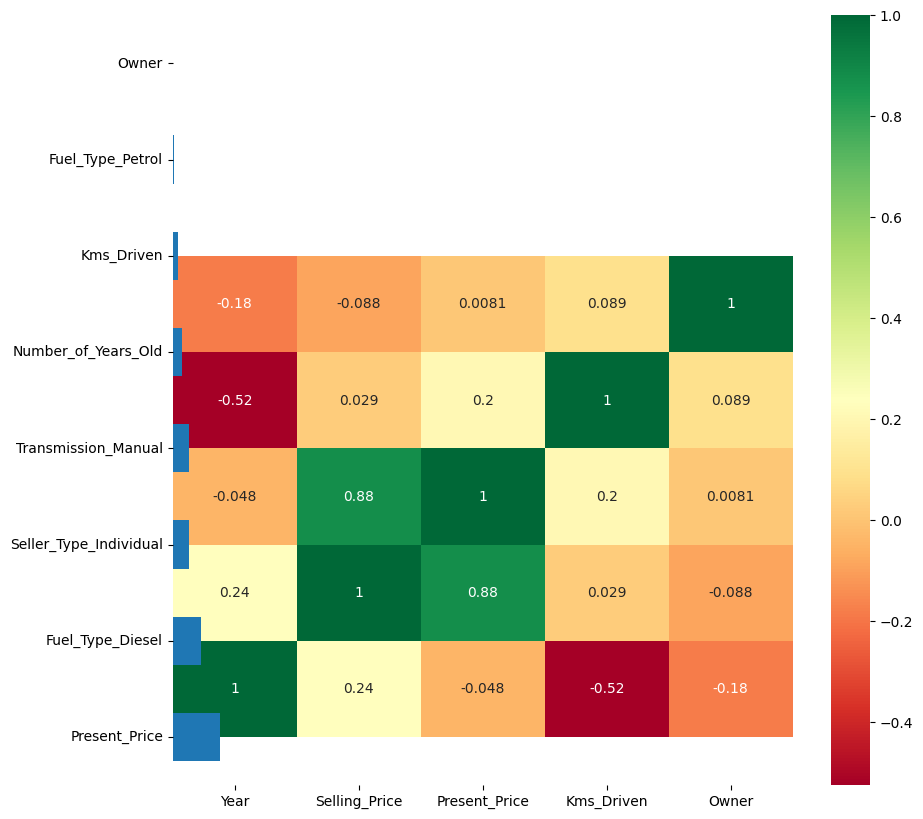

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.9202815383374512
[0.9542394  0.84409548 0.69916028 0.924205   0.92156403]
Accuracy: 86.87 %
Standard Deviation: 9.22 %
Mean Absolute Error: 0.8102197802197801
Mean Squared Error: 2.3840648351648355
RMSE: 1.5440417206684653
The r2_score is 0.9202815383374512


<ipython-input-1-5b8a6f6bdb35>:80: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


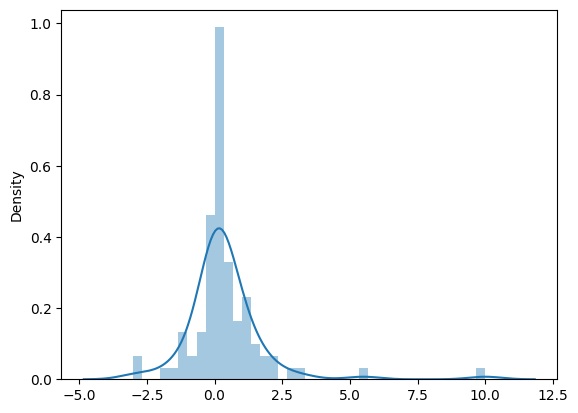

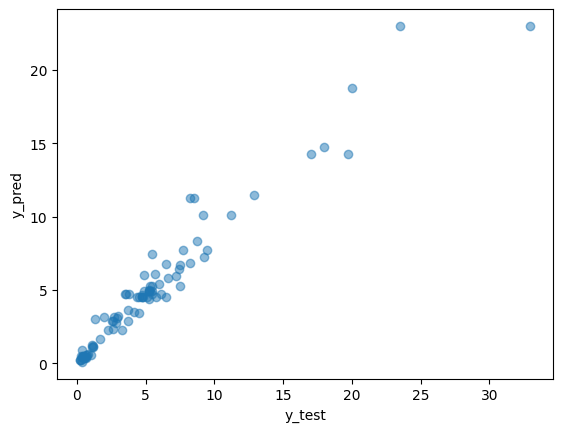

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Score on Training set is 0.9102924152774672
Random Forest Score on Test Set is 0.8684668896877809
[0.9542394  0.84409548 0.69916028 0.924205   0.92156403]
Accuracy: 86.87 %
Standard Deviation: 9.22 %
Mean Absolute Error: 0.8816542925562586
Mean Squared Error: 3.933636655993556
RMSE: 1.9833397732092088
The r2_score is 0.8684668896877809


<ipython-input-1-5b8a6f6bdb35>:103: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


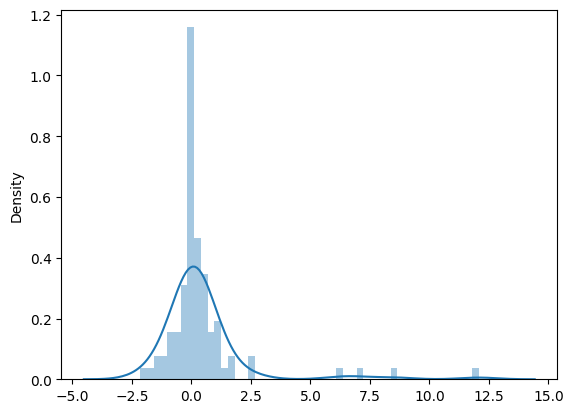

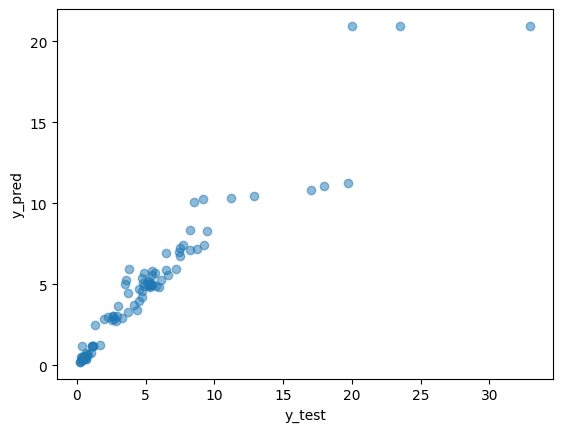

In [1]:
#9921005149 GURRAM VAMSI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('cardata.csv')
print(data.shape)
data.head()
data.isnull().sum()
print('Unique elements in Seller_Type are',data['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',data['Fuel_Type'].unique())
print('Unique elements in Transmission are',data['Transmission'].unique())
print('Unique elements in Owner are',data['Owner'].unique())
print('Unique elements in Year are',data['Year'].unique())
print('Unique elements in Car_Name are',data['Car_Name'].nunique())
data.describe()
dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
dataset.head()
dataset['Present_Year']=2020
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['Year']
dataset.head()
dataset.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
dataset.head()
Fuel_Type=dataset[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)
Seller_Type=dataset[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)
Transmission=dataset[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)
dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)
dataset.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1,
inplace=True)
dataset.head()
dataset.columns
dataset.columns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#9921005149
sell=dataset['Selling_Price']
dataset.drop(['Selling_Price'], axis=1, inplace=True)
dataset=dataset.join(sell)
dataset.head()
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
#9921005080 -Sainath
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)
print("Decision Tree Score on Training set is",dt_reg.score(X_train,
y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing
accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The r2_score is', metrics.r2_score(y_test, y_pred))
sns.distplot(y_test-y_pred)
plt.show()
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()
#9921005149
from sklearn.ensemble import RandomForestRegressor
rf_reg =RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)
print("Random Forest Score on Training set is",rf_reg.score(X_train,y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#TestingAccuracyaccuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The r2_score is', metrics.r2_score(y_test, y_pred))
sns.distplot(y_test-y_pred)
plt.show()
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()
#9921005149